## K-Means Clustering on Mall Customers Dataset




### 1. Import Required Libraries

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Set plot style
sns.set(style='whitegrid')

### 2. Load the Dataset

In [3]:
# Load the dataset
file_path = 'Mall_Customers.csv'
df = pd.read_csv(file_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 3. Explore and Preprocess Data

In [4]:
# Check for missing values
df.info()
print("\nMissing values per column:\n", df.isnull().sum())

# Encode 'Gender' column (Male: 0, Female: 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select features for clustering (Annual Income and Spending Score)
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

# Optionally, you can use more features, e.g., Age and Gender as well:
# features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# X = df[features].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Missing values per column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### 4. Optional: Dimensionality Reduction with PCA for Visualization

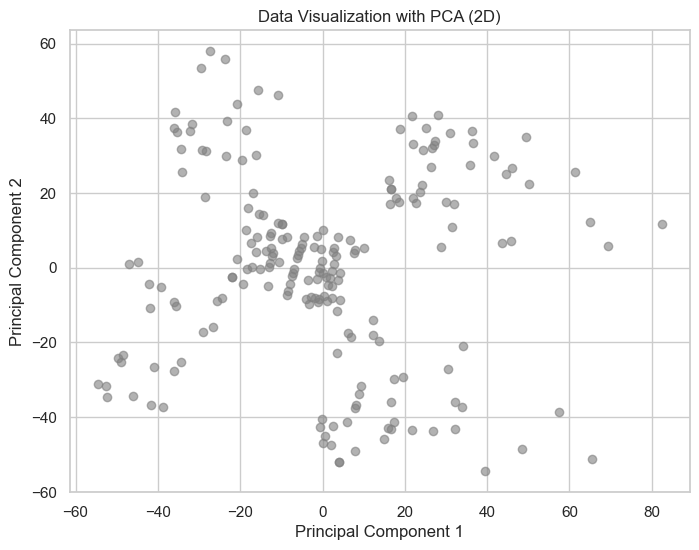

In [ ]:
# Apply PCA to reduce to 2D for visualization (if more than 2 features are used)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='gray', alpha=0.6)
plt.title('Data Visualization with PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('images/pca_2d.png')
plt.show()

### 5. Determine Optimal Number of Clusters (Elbow Method)

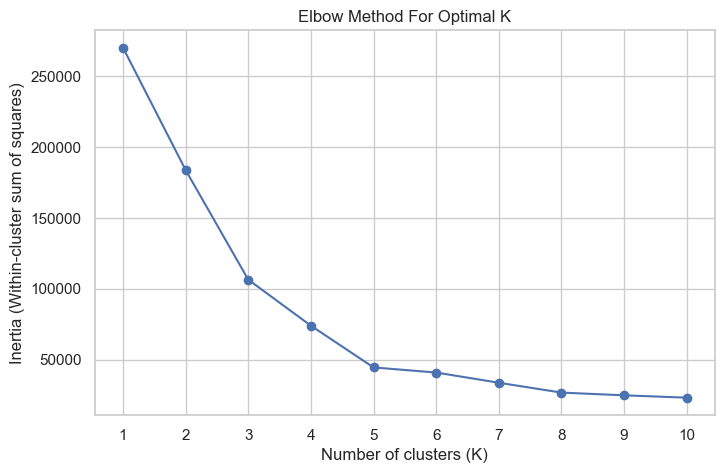

In [ ]:
# Elbow Method to find optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method For Optimal K')
plt.xticks(k_range)
plt.savefig('images/elbow_method.png')
plt.show()

### 6. Fit K-Means and Assign Cluster Labels

In [7]:
# Fit KMeans with the chosen K (e.g., 5 based on the Elbow Method)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X)
df['Cluster'] = labels

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,4
1,2,0,21,15,81,2
2,3,1,20,16,6,4
3,4,1,23,16,77,2
4,5,1,31,17,40,4


### 7. Visualize Clusters with Color-Coding

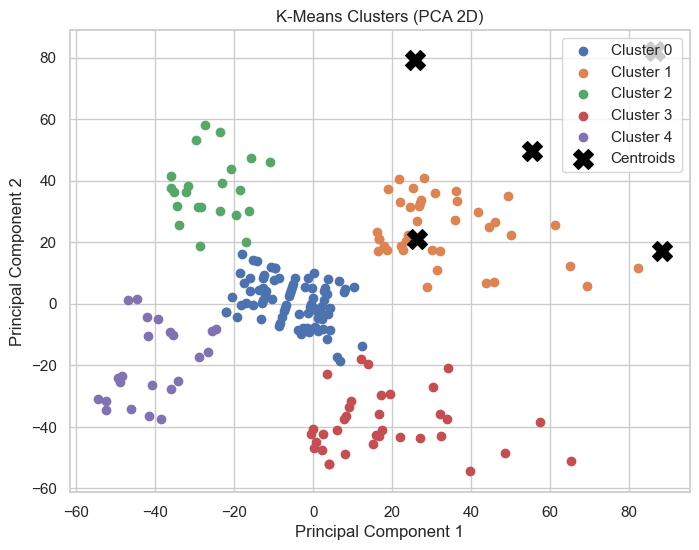

In [ ]:
# Visualize clusters in 2D using PCA components
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label=f'Cluster {cluster}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clusters (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('images/kmeans_clusters.png')
plt.show()

### 8. Evaluate Clustering with Silhouette Score

In [9]:
# Calculate and display the silhouette score
score = silhouette_score(X, labels)
print(f'Silhouette Score for K={optimal_k}: {score:.3f}')

Silhouette Score for K=5: 0.554
